In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [10]:
# Batch piloto

metaDS = pd.read_csv("C:/Users/marci/Desktop/Projeto mestrado/Datasets/Batch Piloto/PilotoWEKA3000.csv")
metaDSnp = metaDS.to_numpy()
print(metaDSnp)

[[5.85200e+01 4.42100e+01 3.04000e+01 ... 1.28298e+03 8.99880e+02
  1.00000e+00]
 [5.85200e+01 4.49600e+01 3.09000e+01 ... 1.20995e+03 9.28270e+02
  1.00000e+00]
 [5.94800e+01 4.36800e+01 3.03700e+01 ... 1.25274e+03 9.42550e+02
  1.00000e+00]
 ...
 [6.31400e+01 4.47800e+01 3.32100e+01 ... 9.89490e+02 9.68530e+02
  1.00000e+00]
 [6.06900e+01 4.41400e+01 3.13400e+01 ... 9.72820e+02 9.54390e+02
  1.00000e+00]
 [5.89000e+01 4.46200e+01 3.25900e+01 ... 9.77460e+02 9.43000e+02
  0.00000e+00]]


In [ ]:
# Batch 06.04

metaDS = pd.read_csv("C:/Users/marci/Desktop/Projeto mestrado/Datasets/Batch 06.04/Treinamento WEKA ajustado/0604MLP.csv")
metaDSnp = metaDS.to_numpy()
print(metaDSnp)

In [ ]:
# batch 06.04

subset = np.empty((0,9))
values = []

for i in range(len(metaDSnp)):
    if int(metaDSnp[i][8]) == 0:
        subset = np.vstack((subset, metaDSnp[i]))

    if int(metaDSnp[i][8]) == 1:
        values.append(i)

aux = len(subset)
randomIndex = np.random.choice(values, aux, replace=False)

for j in range(len(randomIndex)):

    subset = np.vstack((subset, metaDSnp[randomIndex[j]]))

print(subset)
print(len(subset))


In [20]:
# Batch piloto

subset = np.empty((0,13))
print(subset)
values = []

for i in range(len(metaDSnp)):
    if int(metaDSnp[i][12]) == 0:
        subset = np.vstack((subset, metaDSnp[i]))

    if int(metaDSnp[i][12]) == 1:
        values.append(i)

aux = len(subset)
randomIndex = np.random.choice(values, aux, replace=False)

for j in range(len(randomIndex)):

    subset = np.vstack((subset, metaDSnp[randomIndex[j]]))

print(subset)
print(len(subset))



[]
[[5.93300e+01 4.62700e+01 3.06500e+01 ... 1.14559e+03 8.82450e+02
  0.00000e+00]
 [5.81500e+01 4.53700e+01 2.95900e+01 ... 1.20467e+03 9.17430e+02
  0.00000e+00]
 [5.56200e+01 4.38000e+01 2.89300e+01 ... 1.34292e+03 9.84280e+02
  0.00000e+00]
 ...
 [6.06900e+01 4.21300e+01 3.13400e+01 ... 1.00668e+03 9.91090e+02
  1.00000e+00]
 [5.83300e+01 4.40100e+01 2.94100e+01 ... 9.46930e+02 8.84220e+02
  1.00000e+00]
 [5.77900e+01 4.47100e+01 2.99000e+01 ... 9.55800e+02 9.33980e+02
  1.00000e+00]]
1048


C:\Users\marci\AppData\Local\Temp\ipykernel_13356\2122892968.py:73: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  graph.dist = 5


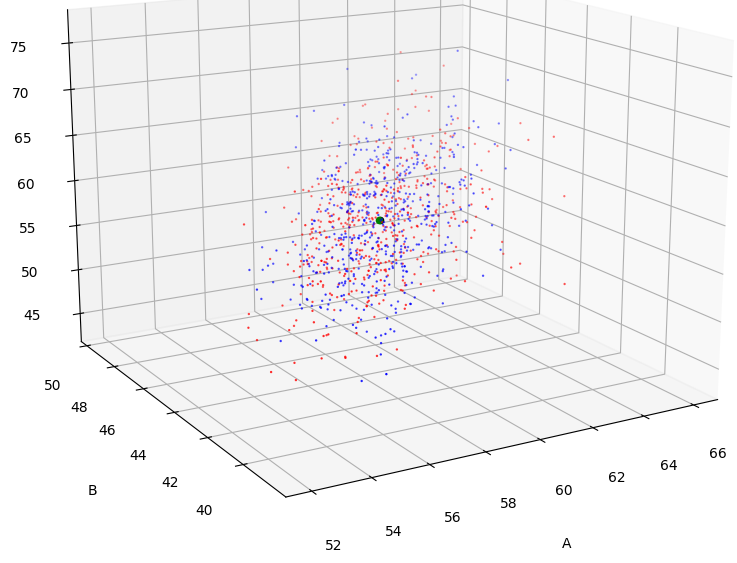

In [29]:
'''
    BATCH 06/04

    Coluna 0 - A
    Coluna 1 - B
    Coluna 2 - C
    Coluna 3 - D
    Coluna 4 - VOLUME
    Coluna 5 - AREA
    Coluna 6 - AREA FORMULA
    Coluna 7 - VOLUME FORMULA
    Coluna 8 - ECLODIU

    -------------------------------

    BATCH PILOTO
    
    Coluna 0 - A
    Coluna 1 - B
    Coluna 2 - C
    Coluna 3 - D
    Coluna 4 - VOLUME
    Coluna 5 - AREA
    Coluna 6 - AREA FORMULA
    Coluna 7 - VOLUME FORMULA
    Coluna 8 - PESO
    Coluna 9 - DENSIDADE ARQUIMEDES
    Coluna 10 - DENSIDADE IMAGEM
    Coluna 11 - DENSIDADE FORMULA
    Coluna 12 - ECLODIU

'''

col1 = 0
col2 = 1
col3 = 8
col4 = 12

x = subset[:, col1]  # Primeira coluna
y = subset[:, col2]  # Segunda coluna
z = subset[:, col3]  # Terceira coluna
classe = subset[:, col4] # Coluna de classificação

# Criação do gráfico tridimensional
figure = plt.figure()
graph = figure.add_subplot(111, projection='3d')

graph.scatter(x[classe == 0], y[classe == 0], z[classe == 0], c='red', label='Não eclodiu', s=0.5)
graph.scatter(x[classe == 1], y[classe == 1], z[classe == 1], c='blue', label='Eclodiu', s=0.5)



medx0 = sum(x[classe == 0])/len(x[classe == 0])
medx1 = sum(x[classe == 1])/len(x[classe == 1])

medy0 = sum(y[classe == 0])/len(y[classe == 0])
medy1 = sum(y[classe == 1])/len(y[classe == 1])

medz0 = sum(z[classe == 0])/len(z[classe == 0])
medz1 = sum(z[classe == 1])/len(z[classe == 1])

graph.scatter(medx0, medy0, medz0, c='green', label='Não eclodiu', s=20)
graph.scatter(medx1, medy1, medz1, c='black', label='Eclodiu', s=20)


# Adicionar rótulos
graph.set_xlabel(metaDS.columns[col1])
graph.set_ylabel(metaDS.columns[col2])
graph.set_zlabel(metaDS.columns[col3])

# Rotação da vizualização
graph.view_init(elev=15, azim=240) 
graph.dist = 5
# Mostrar o gráfico
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_4604\3374620166.py:48: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  graph.dist = 3


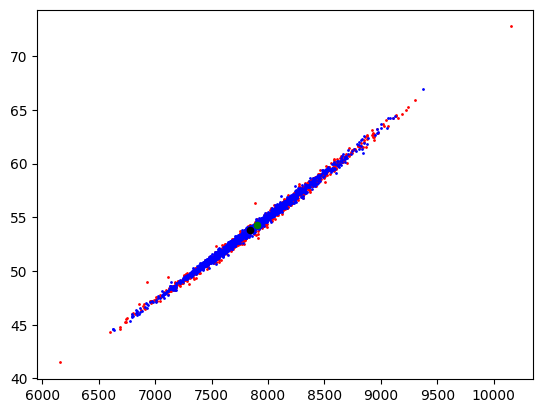

In [42]:
'''
    Coluna 0 - A
    Coluna 1 - B
    Coluna 2 - C
    Coluna 3 - D
    Coluna 4 - VOLUME
    Coluna 5 - AREA
    Coluna 6 - AREA FORMULA
    Coluna 7 - VOLUME FORMULA
    Coluna 8 - ECLODIU
'''

col1 = 5
col2 = 4
col4 = 8

x = subset[:, col1]  # Primeira coluna
y = subset[:, col2]  # Segunda coluna
classe = subset[:, col4] # Coluna de classificação

plt.scatter(x[classe == 0], y[classe == 0], c='red', label='Não eclodiu', s=1)
plt.scatter(x[classe == 1], y[classe == 1], c='blue', label='Eclodiu', s=1)

medx0 = sum(x[classe == 0])/len(x[classe == 0])
medx1 = sum(x[classe == 1])/len(x[classe == 1])

medy0 = sum(y[classe == 0])/len(y[classe == 0])
medy1 = sum(y[classe == 1])/len(y[classe == 1])

plt.scatter(medx0, medy0, c='green', label='Não eclodiu', s=20)
plt.scatter(medx1, medy1, c='black', label='Eclodiu', s=20)

# Adicionar rótulos
graph.set_xlabel(metaDS.columns[col1])
graph.set_ylabel(metaDS.columns[col2])

graph.dist = 3
# Mostrar o gráfico
plt.show()